### Task 1 : Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from pandas_datareader import data as wb

### Task 2 : Import Data Single Stock

In [2]:
data = wb.DataReader(["ICBP.JK", "UNVR.JK","MYOR.JK", "^JKSE"], "yahoo", start = "2014-01-01")["Adj Close"]

In [3]:
data.head()

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2014-01-02,4267.802734,3613.252686,544.205444,4327.136719
2014-01-03,4165.701660,3572.806641,544.205444,4257.536621
2014-01-06,4135.071777,3606.511719,533.739929,4202.684082
2014-01-07,4124.861328,3532.359375,523.274475,4175.682129
2014-01-08,4114.651855,3532.359375,523.274475,4200.467773


In [4]:
data.tail()

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2020-07-29,9125.0,8142.674805,2350.0,5111.112793
2020-07-30,9200.0,8290.723633,2350.0,5149.626953
2020-08-03,9300.0,8142.674805,2290.0,5006.223145
2020-08-04,10025.0,8118.000000,2300.0,5075.001953
2020-08-05,10550.0,8250.000000,2280.0,5127.050781


In [5]:
data.index = pd.to_datetime(data.index)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1654 entries, 2014-01-02 to 2020-08-05
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ICBP.JK  1654 non-null   float64
 1   UNVR.JK  1654 non-null   float64
 2   MYOR.JK  1654 non-null   float64
 3   ^JKSE    1603 non-null   float64
dtypes: float64(4)
memory usage: 64.6 KB


##### Rumus CAPM

$$E(Ri) = Rf + \beta i [E(Rm) - Rf]$$

$E(Ri) = $ Expected Return Sekuritas i

$Rf = $ Tingkat Return Investasi Free Risk

$\beta i = $ beta, ukuran risiko sekuritas i

$E(Rm) = $ Expected Return Market (Pasar)

$(E(Rm) - Rf) = $ Risiko Pasar

### Task 3 : Expected Return $Ri$ dan $E(Rm)$


In [7]:
data = pd.DataFrame(data).copy()

In [8]:
data.head(10)

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2014-01-02,4267.802734,3613.252686,544.205444,4327.136719
2014-01-03,4165.701660,3572.806641,544.205444,4257.536621
2014-01-06,4135.071777,3606.511719,533.739929,4202.684082
2014-01-07,4124.861328,3532.359375,523.274475,4175.682129
2014-01-08,4114.651855,3532.359375,523.274475,4200.467773
2014-01-09,4073.812256,3515.506836,518.041748,4201.092773
2014-01-10,4084.022217,3491.912354,521.181335,4254.845215
2014-01-13,4145.281738,3643.588379,526.414124,4390.640625
2014-01-15,4390.323242,3778.411377,522.227905,4441.462402


In [9]:
data.tail()

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2020-07-29,9125.0,8142.674805,2350.0,5111.112793
2020-07-30,9200.0,8290.723633,2350.0,5149.626953
2020-08-03,9300.0,8142.674805,2290.0,5006.223145
2020-08-04,10025.0,8118.000000,2300.0,5075.001953
2020-08-05,10550.0,8250.000000,2280.0,5127.050781


Daily Return

In [10]:
Data_daily_r = data.pct_change().dropna()

In [11]:
Data_daily_r.head()

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2014-01-03,-0.023924,-0.011194,0.000000,-0.016085
2014-01-06,-0.007353,0.009434,-0.019231,-0.012884
2014-01-07,-0.002469,-0.020561,-0.019608,-0.006425
2014-01-08,-0.002475,0.000000,0.000000,0.005936
2014-01-09,-0.009925,-0.004771,-0.010000,0.000149


In [12]:
Data_daily_r.tail()

Symbols,ICBP.JK,UNVR.JK,MYOR.JK,^JKSE
Date,,,,
2020-07-29,0.008287,0.012270,0.035242,-0.000367
2020-07-30,0.008219,0.018182,0.000000,0.007535
2020-08-03,0.010870,-0.017857,-0.025532,-0.027847
2020-08-04,0.077957,-0.003030,0.004367,0.013739
2020-08-05,0.052369,0.016260,-0.008696,0.010256


Annual Return

In [13]:
# Data_ann = data.resample("Y").last().pct_change().mul(100).dropna()
# Data_ann.mean()

In [14]:
Data_ann_r = Data_daily_r.mean() * 250
Data_ann_r

Symbols
ICBP.JK    0.175924
UNVR.JK    0.163850
MYOR.JK    0.275258
^JKSE      0.038085
dtype: float64

Month Return

In [15]:
# Data_mon = data.resample("BM").last().pct_change().mul(100).dropna()
# print(Data_mon.head())
# Data_mon_r = Data_mon.mean()
# print(Data_mon_r)

### Task 4 : Menghitung $\beta_{i}$

##### Rumus Beta

$$\beta_{i} =\frac{\sigma_{im}} {\sigma^2_{m}}$$

$\sigma_{im}$ = Covarian(return sekuritas i, return market)

$\sigma^2_{m}$ = Variansi (Return Market)

beta berdasar return harian

In [16]:
# cov = Data_daily_r.cov()*252
# cov.index.name = None
# cov_with_market = cov.iloc[1,2]
# market_var = Data_daily_r["^JKSE"].var()*252
# beta = cov_with_market / market_var
# beta

In [17]:
beta_ = []
a = []
for i in range(len(data.columns)):
    b = Data_daily_r.iloc[:,i]
    beta_.append((b.cov(Data_daily_r["^JKSE"]))/Data_daily_r["^JKSE"].var())

In [18]:
beta_

[0.9510421566701981, 1.0899761808728847, 0.667844738336208, 1.0000000000000022]

beta berdasar return bulanan

In [19]:
# cov = Data_mon.cov()
# cov.index.name = None
# cov_with_market = cov.iloc[0,1]
# market_var = Data_mon["^JKSE"].var()
# beta_m = cov_with_market / market_var
# beta_m

Beta berdasar return tahunan

In [20]:
# cov = Data_ann.cov()
# cov.index.name = None
# cov_with_market = cov.iloc[0,1]
# market_var = Data_ann["^JKSE"].var()
# cov_with_market / market_var

### Task 5 : Menghitung $Rf$

In [21]:
rf = 0.04

### Task 6 : Menghitung $E(Ri)$

In [22]:
# ERi = (rf + beta*(Data_ann_r["^JKSE"]-rf))
# ERi
# Data_ann_r["^JKSE"]-rf

In [23]:
ERi = []
Emiten = []
beta = []
Ri = []
for i in range(len(beta_)-1):
    a = (rf + beta_[i]*(Data_ann_r["^JKSE"]-rf))
    ERi.append(a)
    Emiten.append(data.columns[i])
    beta.append(beta_[i])
    Ri.append(Data_ann_r[i])
    
beta_emiten = pd.DataFrame({"Emiten":Emiten,
                            "Beta":beta,
                            "Re":ERi,
                            "Ri":Ri}) 
beta_emiten

,Emiten,Beta,Re,Ri
0,ICBP.JK,0.951042,0.038179,0.175924
1,UNVR.JK,1.089976,0.037913,0.163850
2,MYOR.JK,0.667845,0.038721,0.275258


### Task 7 : Ploting

[]

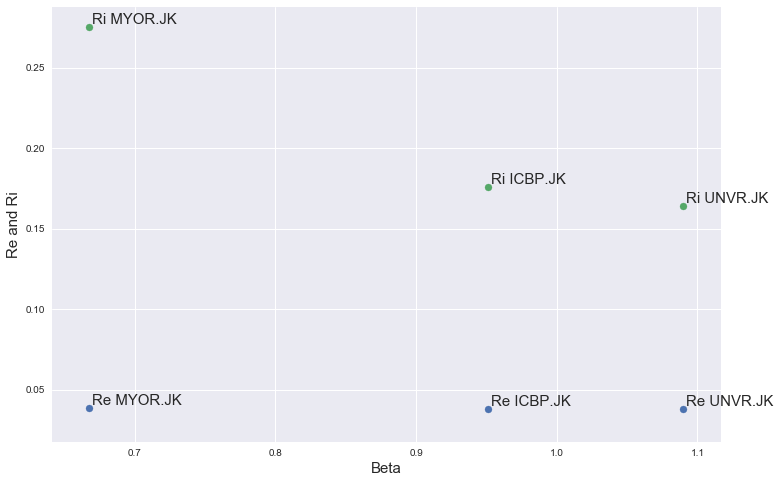

In [27]:
plt.figure(figsize = (12,8))
plt.scatter(beta_emiten["Beta"],beta_emiten["Re"])
for i in beta_emiten.index:
    plt.annotate("Re " + Emiten[i], xy = (beta_emiten.loc[i,"Beta"]+0.002, beta_emiten.loc[i, "Re"]+0.002), size = 15)
plt.scatter(beta_emiten["Beta"],beta_emiten["Ri"])
for i in beta_emiten.index:
    plt.annotate("Ri " +Emiten[i], xy = (beta_emiten.loc[i,"Beta"]+0.002, beta_emiten.loc[i, "Ri"]+0.002), size = 15)
# plt.title("ann.Risk(std)", fontsize = 15)
plt.ylabel("Re and Ri", fontsize = 15)
plt.xlabel("Beta", fontsize = 15)
plt.plot()